<a href="https://colab.research.google.com/github/girishkuks/data_science/blob/main/Linear_Regression_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
data = pd.read_csv('https://raw.githubusercontent.com/girishkuks/data_science/refs/heads/main/50_Startups.csv')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [55]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
# We have 5 variables, out of which, four are continuous data and one catagorical data.

In [56]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [57]:
data_numeric = data.drop(['State'], axis=1)

In [58]:
data_numeric.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

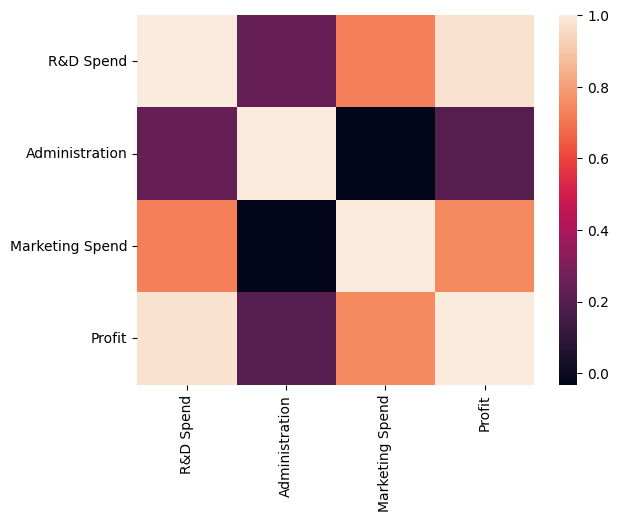

In [59]:
sns.heatmap(data_numeric.corr())

In [60]:
data.nunique()

,0
R&D Spend,49
Administration,50
Marketing Spend,48
State,3
Profit,50


In [61]:
data.value_counts()

,,,,,count
R&D Spend,Administration,Marketing Spend,State,Profit,
0.00,116983.80,45173.06,California,14681.40,1
101913.08,110594.11,229160.95,Florida,146121.95,1
76253.86,113867.30,298664.47,California,118474.03,1
77044.01,99281.34,140574.81,New York,108552.04,1
78013.11,121597.55,264346.06,California,126992.93,1
78389.47,153773.43,299737.29,New York,111313.02,1
86419.70,153514.11,0.00,New York,122776.86,1
91749.16,114175.79,294919.57,Florida,124266.90,1
91992.39,135495.07,252664.93,California,134307.35,1


In [62]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(drop='first') # drop the first dummy variable (K-1)

enc_df = pd.DataFrame(enc.fit_transform(data[['State']]).toarray())
enc_df.columns = ['Florida', 'New York']
# merge with main df on key values
data = data.join(enc_df)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,1.0,0.0


In [65]:
data = data.drop(['State'], axis = 1)

In [66]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


In [69]:
X = data.drop(['Profit'], axis = 1)
Y = data['Profit']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40, 5)
(10, 5)
(40,)
(10,)


In [74]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)


In [75]:
print('COefficient', model.coef_)
print('Intercept', model.intercept_)
print('Y Pred',Y_pred)

COefficient [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]
Intercept 54028.03959364581


In [76]:
comparison_df = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})

In [78]:
difference = comparison_df['Actual'] - comparison_df['Predicted']

difference

,0
13,7944.470917
39,-3602.693836
30,260.095749
45,18568.619314
17,-3380.112885
48,-15239.007419
26,-4007.810327
25,6761.097184
32,-171.435746
19,9679.434756


Text(0, 0.5, 'Predictions')

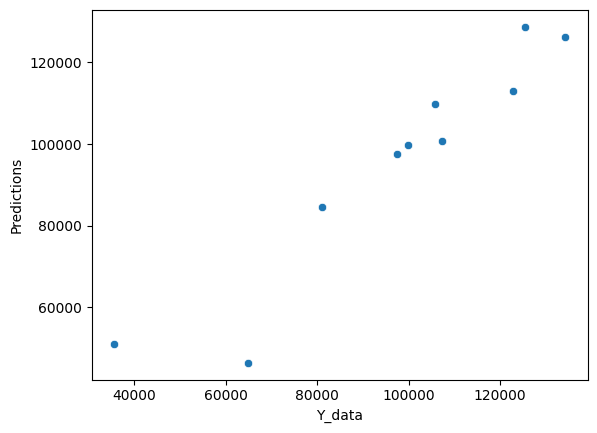

In [81]:
import matplotlib.pyplot as plt
sns.scatterplot(x=Y_test, y = Y_pred )
plt.xlabel('Y_data')
plt.ylabel('Predictions')

In [85]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
score

0.8987266414328637